第6章　不均一分散
=====
『Rによる計量経済学』第6章「不均一分散」におけるPythonコードです。  
テキスト付属データセット(「k0601.csv」等)については出版社サイトよりダウンロードしてください。

例題6-1
-----
「k0601.csv」を用いた均一分散のデータである場合の回帰分析。   
BP統計量による不均一分散の有無の仮説検定を行います。

In [1]:
%matplotlib inline

In [2]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import pyper as pr
import matplotlib.pyplot as plt

データを読み込みます。

In [3]:
data = pd.read_csv('example/k0601.csv')

Rへデータを渡します。

In [4]:
r = pr.R(use_pandas=True)
r.assign('data1', data)

Rのコマンドを実行します。
ここではsummary()を使って回帰分析の結果と、bptest()を使ってBP統計量による自己相関の有無の仮説検定を表示します。
なお、bptest()はlmtestというパッケージを予めRでインストールしてインポートしておく必要があります。Rstudioを開き、Tools -> Install Packages で開かれた画面のPackagesの欄に「lmtest」と入力してInstallボタンをクリックすれば正常にインストールされます。

In [5]:
r('library(lmtest)')
r('fm <- lm(Y ~ X, data=data1)')
print r('summary(fm)')
print r('bptest(fm)')

try({summary(fm)})

Call:
lm(formula = Y ~ X, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3212 -0.2682 -0.1515  0.5833  0.8485 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.53333    0.48011   1.111    0.299    
X            0.95758    0.07738  12.376 1.69e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7028 on 8 degrees of freedom
Multiple R-squared:  0.9504,	Adjusted R-squared:  0.9442 
F-statistic: 153.2 on 1 and 8 DF,  p-value: 1.695e-06


try({bptest(fm)})

	studentized Breusch-Pagan test

data:  fm
BP = 0.1463, df = 1, p-value = 0.702




帰無仮説BP=0を棄却することはできず、不均一分散ではなく均一分散であると結論することができます。

最後にデータをPython側にとってきて、散布図と回帰直線を描きます。

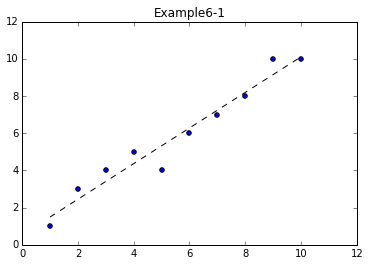

In [6]:
fm = r.get('fm$fitted.values')
plt.scatter(data["X"], data["Y"])
plt.plot(data["X"], fm, 'k--')
plt.title('Example6-1')

例題6-2
-----
「k0602.csv」を用いた不均一分散のデータである場合の回帰分析。   
BP統計量による不均一分散の有無の仮説検定を行います。

データを読み込みます。

In [7]:
data = pd.read_csv('example/k0602.csv')

Rへデータを渡します。

In [8]:
r = pr.R(use_pandas=True)
r.assign('data1', data)

Rのコマンドを実行します。  
ここではsummary()を使って回帰分析の結果と、bptest()を使ってBP統計量による自己相関の有無の仮説検定を表示します。

In [9]:
r('library(lmtest)')
r('fm <- lm(Y ~ X, data=data1)')
print r('summary(fm)')
print r('bptest(fm)')

try({summary(fm)})

Call:
lm(formula = Y ~ X, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4545 -0.7409 -0.3636  1.4000  2.2909 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   1.0000     1.1597   0.862  0.41362   
X             0.7455     0.1869   3.989  0.00401 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.698 on 8 degrees of freedom
Multiple R-squared:  0.6654,	Adjusted R-squared:  0.6236 
F-statistic: 15.91 on 1 and 8 DF,  p-value: 0.004013


try({bptest(fm)})

	studentized Breusch-Pagan test

data:  fm
BP = 8.7999, df = 1, p-value = 0.003012




有意水準1%でも帰無仮説BP=0を棄却することができ、不均一分散であると結論することができます。

最後にデータをPython側にとってきて、散布図と回帰直線を描きます。

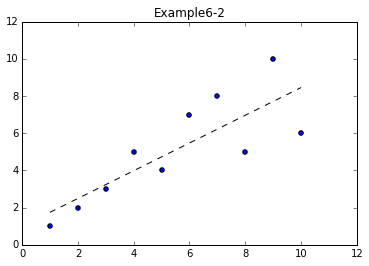

In [10]:
fm = r.get('fm$fitted.values')
plt.scatter(data["X"], data["Y"])
plt.plot(data["X"], fm, 'k--')
plt.title('Example6-2')

例題6-3
-----
「k0602.csv」を用いた不均一分散のデータである場合の回帰分析。  
不均一分散が存在する場合、変数を対数化することによって不均一分散の状態の解消を行います。

先ほど読み込んだ「k0602.csv」のデータから変数の対数化を行います。

In [11]:
data["lnX"] = np.log(data["X"])
data["lnY"] = np.log(data["Y"])

In [12]:
r = pr.R(use_pandas=True)
r.assign('data1', data)

try({summary(fm)})

Call:
lm(formula = lnY ~ lnX, data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36228 -0.14296 -0.01086  0.24189  0.26785 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1124     0.1960   0.573    0.582    
lnX           0.8867     0.1179   7.523 6.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2592 on 8 degrees of freedom
Multiple R-squared:  0.8761,	Adjusted R-squared:  0.8607 
F-statistic: 56.59 on 1 and 8 DF,  p-value: 6.781e-05


try({bptest(fm)})

	studentized Breusch-Pagan test

data:  fm
BP = 5.6443, df = 1, p-value = 0.01751




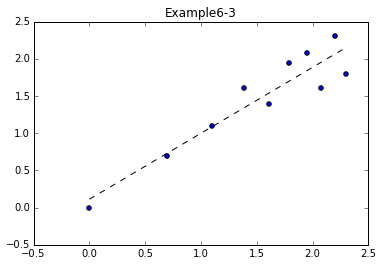

In [13]:
r('library(lmtest)')
r('fm <- lm(lnY ~ lnX, data=data1)')
print r('summary(fm)')
print r('bptest(fm)')

fm = r.get('fm$fitted.values')
plt.scatter(data["lnX"], data["lnY"])
plt.plot(data["lnX"], fm, 'k--')
plt.title('Example6-3')

あれ？まだ不均一分散残ってますね笑  

ちなみに本書では何故か対数化する過程で「k0602.csv」の元のX,Yデータが変わってて対数化による不均一分散の解消が成功しているかのごとくなっています笑

「k0602.csv」と「k0603.csv」のデータ比較。

In [14]:
data6_2 = pd.read_csv('example/k0602.csv')
data6_3 = pd.read_csv('example/k0603.csv')

In [15]:
data6_2

,i,X,Y
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,5
4,5,5,4
5,6,6,7
6,7,7,8
7,8,8,5
8,9,9,10
9,10,10,6


In [16]:
data6_3

,i,X,Y,lnX,lnY
0,1,1.0,1.0,0.000000,0.000000
1,2,1.5,2.5,0.405465,0.916291
2,3,2.0,2.0,0.693147,0.693147
3,4,2.5,3.5,0.916291,1.252763
4,5,3.0,3.0,1.098612,1.098612
5,6,4.0,6.0,1.386294,1.791759
6,7,6.0,8.0,1.791759,2.079442
7,8,7.0,5.0,1.945910,1.609438
8,9,9.0,10.0,2.197225,2.302585
9,10,10.0,6.0,2.302585,1.791759


やっぱりX, Yの値が変わってる笑  
とりあえず「k0603.csv」の場合の回帰も行います。

try({summary(fm)})

Call:
lm(formula = lnY ~ lnX, data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39976 -0.26559  0.03897  0.25161  0.34650 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3162     0.1926   1.642  0.13924    
lnX           0.8144     0.1306   6.235  0.00025 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3068 on 8 degrees of freedom
Multiple R-squared:  0.8293,	Adjusted R-squared:  0.808 
F-statistic: 38.88 on 1 and 8 DF,  p-value: 0.0002497


try({bptest(fm)})

	studentized Breusch-Pagan test

data:  fm
BP = 0.8376, df = 1, p-value = 0.3601




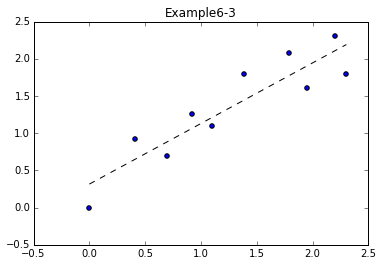

In [17]:
r = pr.R(use_pandas=True)
r.assign('data1', data6_3)

r(' library(lmtest)  ')
r('fm <- lm(lnY ~ lnX, data=data1)')
print r('summary(fm)')
print r('bptest(fm)')

fm = r.get('fm$fitted.values')
plt.scatter(data6_3["lnX"], data6_3["lnY"])
plt.plot(data6_3["lnX"], fm, 'k--')
plt.title('Example6-3')

例題6-4
-----
「k0602.csv」を用いた不均一分散のデータである場合の回帰分析。
不均一分散が存在する場合、第3の変数を基準とした比率に変換することによって不均一分散の状態の解消を行います。

例題6-4で使う「k0604.csv」も「k0602.csv」とデータが異なるので、「k0602.csv」を基にしたデータの加工は省き、直接行います。

In [18]:
data = pd.read_csv('example/k0604.csv')

ちなみにデータの中身はこのようになっていて、  
XZ = X / Z  
YZ = Y / Z  
で簡単に求めることが出来ます。  

In [19]:
data

,i,X,Y,Z,XZ,YZ
0,1,1.0,1.0,0.8,1.250000,1.250000
1,2,1.5,2.5,1.5,1.000000,1.666667
2,3,2.0,2.0,2.5,0.800000,0.800000
3,4,2.5,3.5,4.0,0.625000,0.875000
4,5,3.0,3.0,3.0,1.000000,1.000000
5,6,4.0,6.0,3.5,1.142857,1.714286
6,7,6.0,8.0,4.0,1.500000,2.000000
7,8,7.0,5.0,7.5,0.933333,0.666667
8,9,9.0,10.0,9.0,1.000000,1.111111
9,10,10.0,6.0,12.0,0.833333,0.500000


try({summary(fm)})

Call:
lm(formula = YZ ~ XZ, data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38733 -0.24799 -0.03496  0.25279  0.52138 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.4025     0.4676  -0.861    0.414   
XZ            1.5477     0.4517   3.426    0.009 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3335 on 8 degrees of freedom
Multiple R-squared:  0.5947,	Adjusted R-squared:  0.5441 
F-statistic: 11.74 on 1 and 8 DF,  p-value: 0.009004


try({bptest(fm)})

	studentized Breusch-Pagan test

data:  fm
BP = 0.3859, df = 1, p-value = 0.5345




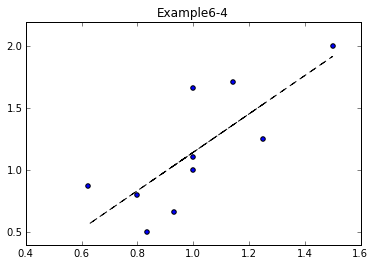

In [20]:
r = pr.R(use_pandas=True)
r.assign('data1', data)

r('library(lmtest)')
r('fm <- lm(YZ ~ XZ, data=data1)')
print r('summary(fm)')
print r('bptest(fm)')

fm = r.get('fm$fitted.values')
plt.scatter(data["XZ"], data["YZ"])
plt.plot(data["XZ"], fm, 'k--')
plt.title('Example6-4')